In [110]:
import preprocess
import importlib
importlib.reload(preprocess)

<module 'preprocess' from '/Users/alexc/columbia/fl23/aml/Lending_Club_Loan_Prediction/preprocess.py'>

In [111]:
data_path = 'data/loan.csv'
df = preprocess.read_data(data_path)

/Users/alexc/columbia/fl23/aml/Lending_Club_Loan_Prediction/preprocess.py:15: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


   id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN       2500         2500           2500.0   36 months   
1 NaN        NaN      30000        30000          30000.0   60 months   
2 NaN        NaN       5000         5000           5000.0   36 months   
3 NaN        NaN       4000         4000           4000.0   36 months   
4 NaN        NaN      30000        30000          30000.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.56        84.92     C        C1  ...                            NaN   
1     18.94       777.23     D        D2  ...                            NaN   
2     17.97       180.69     D        D1  ...                            NaN   
3     18.94       146.51     D        D2  ...                            NaN   
4     16.14       731.78     C        C4  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0   

In [112]:
df.drop(['id', 'member_id'], axis=1, inplace=True)
print(df.shape)
print(df.head())

(2260668, 143)
   loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       2500         2500           2500.0   36 months     13.56        84.92   
1      30000        30000          30000.0   60 months     18.94       777.23   
2       5000         5000           5000.0   36 months     17.97       180.69   
3       4000         4000           4000.0   36 months     18.94       146.51   
4      30000        30000          30000.0   60 months     16.14       731.78   

  grade sub_grade       emp_title emp_length  ...  \
0     C        C1            Chef  10+ years  ...   
1     D        D2     Postmaster   10+ years  ...   
2     D        D1  Administrative    6 years  ...   
3     D        D2   IT Supervisor  10+ years  ...   
4     C        C4        Mechanic  10+ years  ...   

  hardship_payoff_balance_amount  hardship_last_payment_amount  \
0                            NaN                           NaN   
1                            NaN               

<BarContainer object of 143 artists>

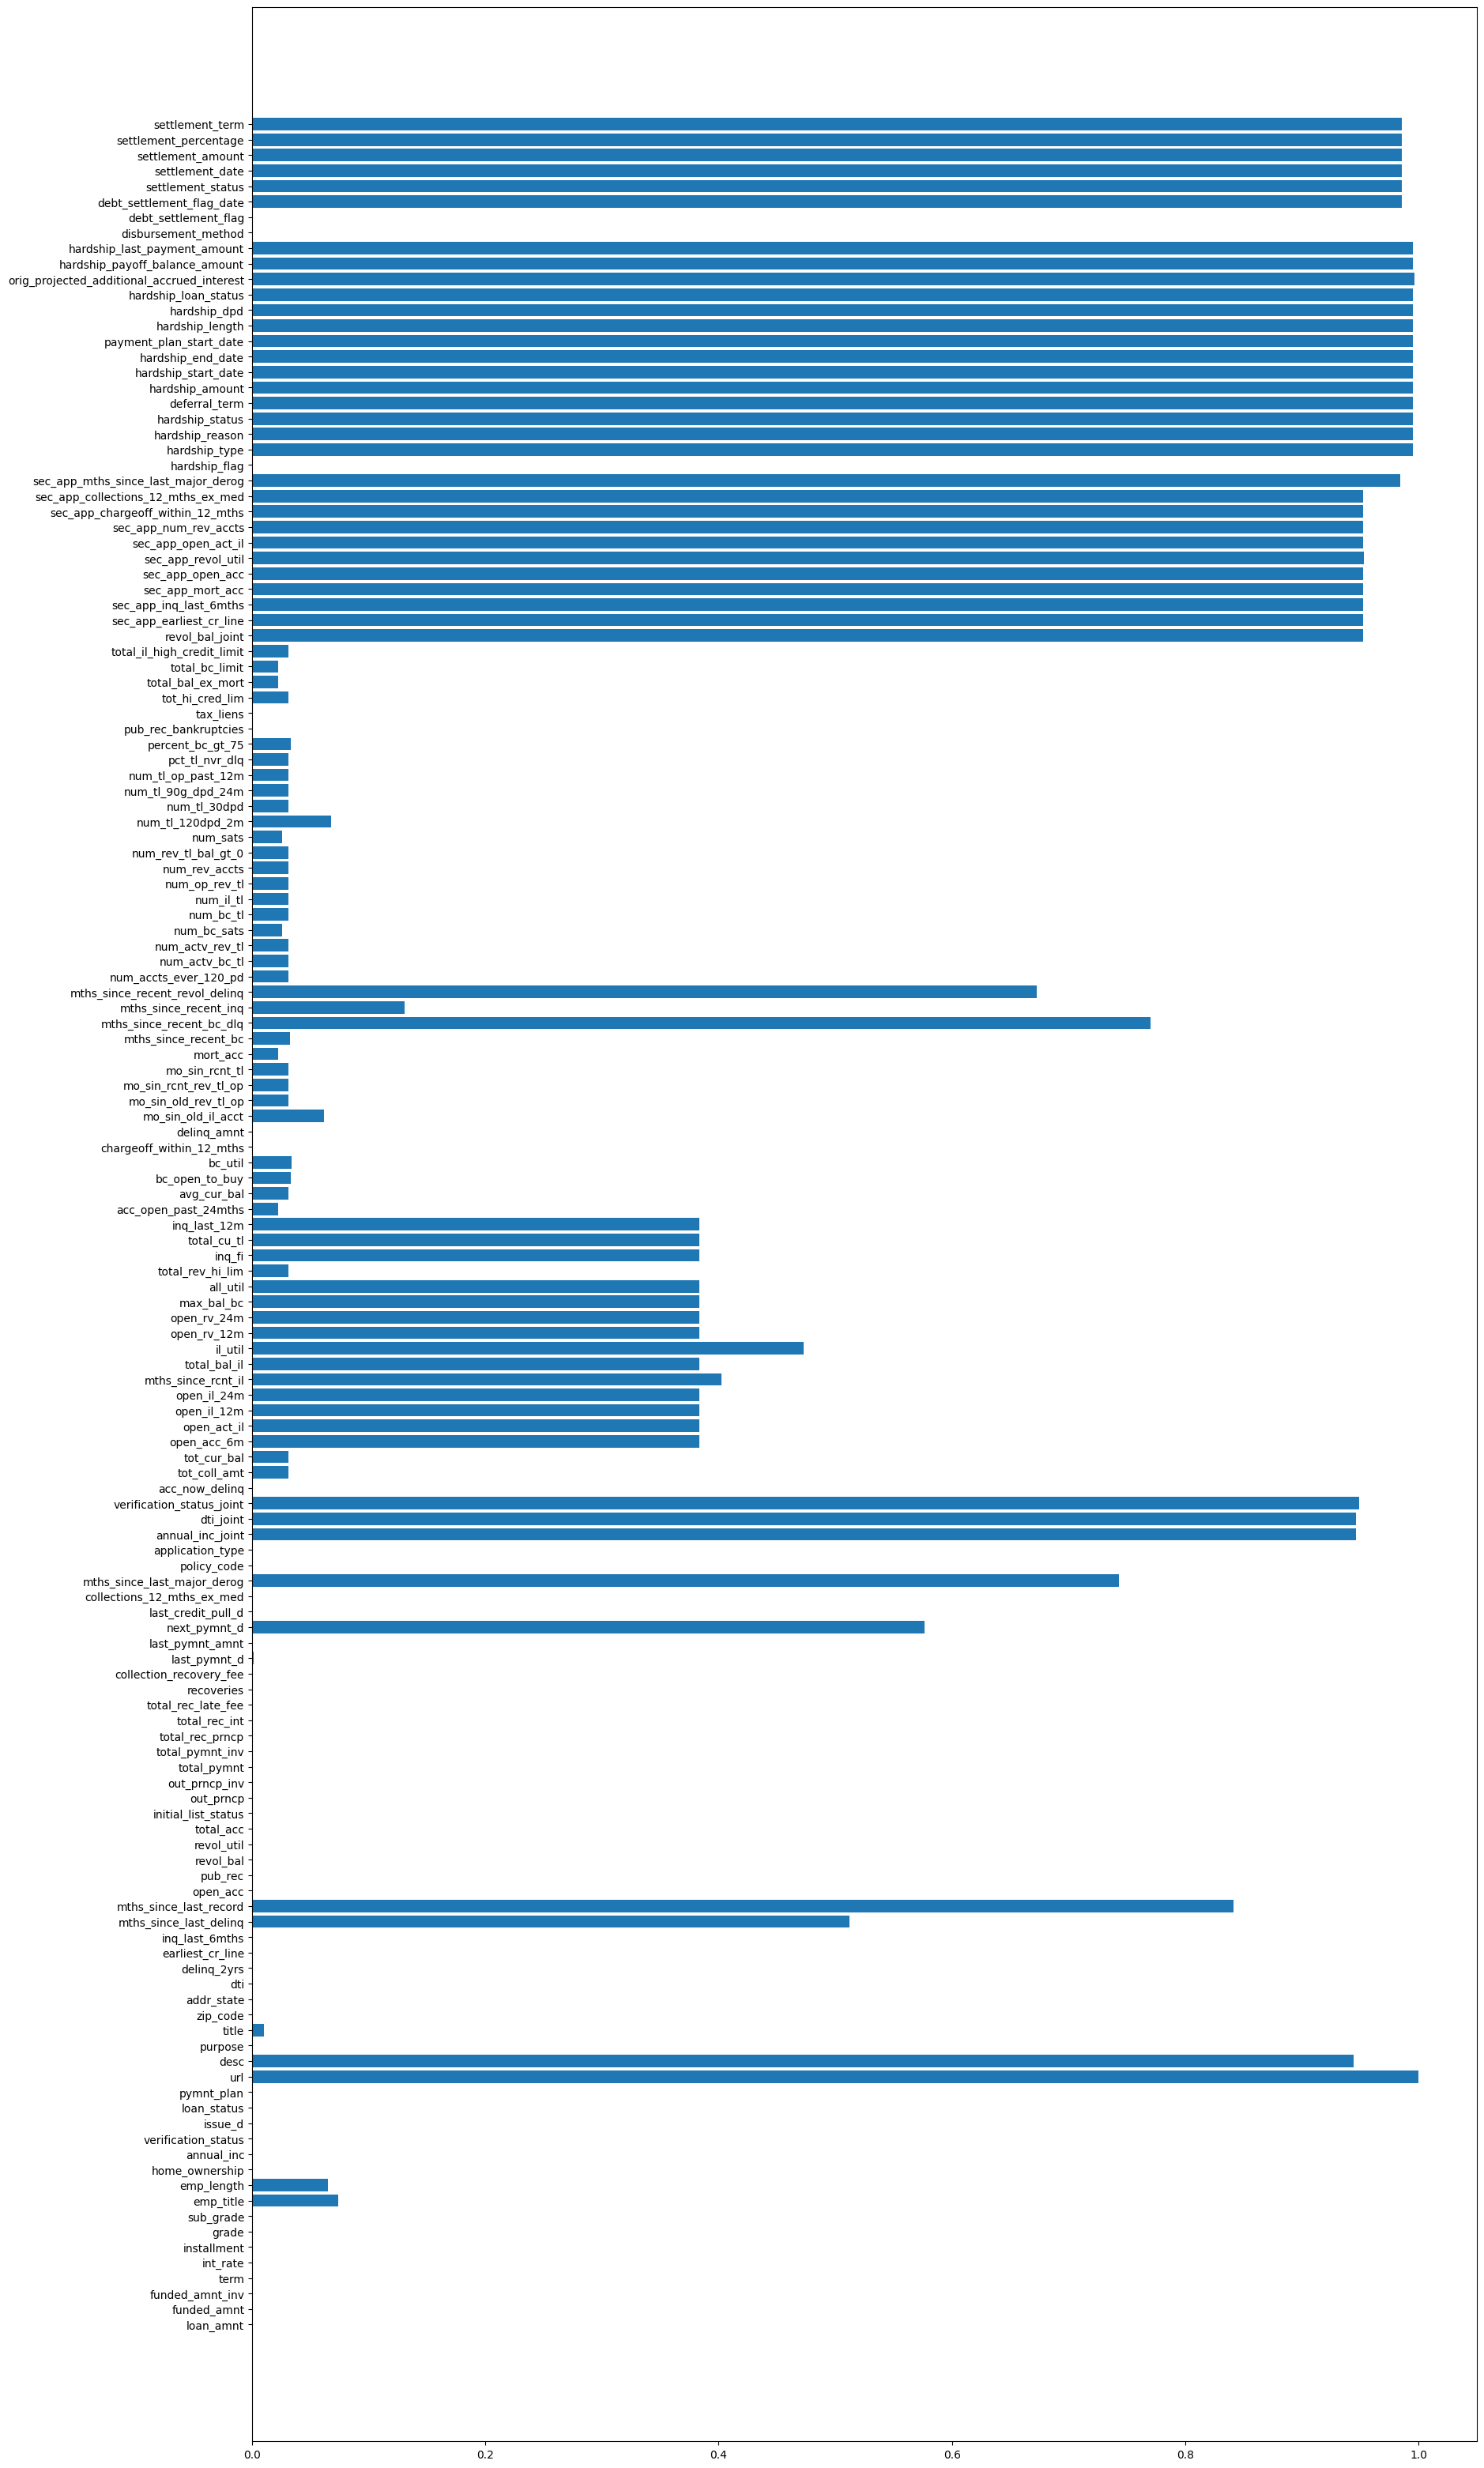

In [113]:
column_names = df.columns
# check for nan rate
from matplotlib import pyplot as plt
plot, ax = plt.subplots(figsize=(20, 40))
ax.barh(column_names, df.isna().sum() / df.shape[0])

In [114]:
# threshold for nan rate
column_threshold = 0.3
row_threshold = 0.00
preprocess.cleanup_df(df, column_threshold, row_threshold)
print(df.head())


   loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       2500         2500           2500.0   36 months     13.56        84.92   
1      30000        30000          30000.0   60 months     18.94       777.23   
2       5000         5000           5000.0   36 months     17.97       180.69   
3       4000         4000           4000.0   36 months     18.94       146.51   
4      30000        30000          30000.0   60 months     16.14       731.78   

  grade sub_grade       emp_title emp_length  ... percent_bc_gt_75  \
0     C        C1            Chef  10+ years  ...              0.0   
1     D        D2     Postmaster   10+ years  ...              0.0   
2     D        D1  Administrative    6 years  ...              0.0   
3     D        D2   IT Supervisor  10+ years  ...            100.0   
4     C        C4        Mechanic  10+ years  ...              0.0   

   pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
0                   1

(2260668, 104)


(0.0, 1.0)

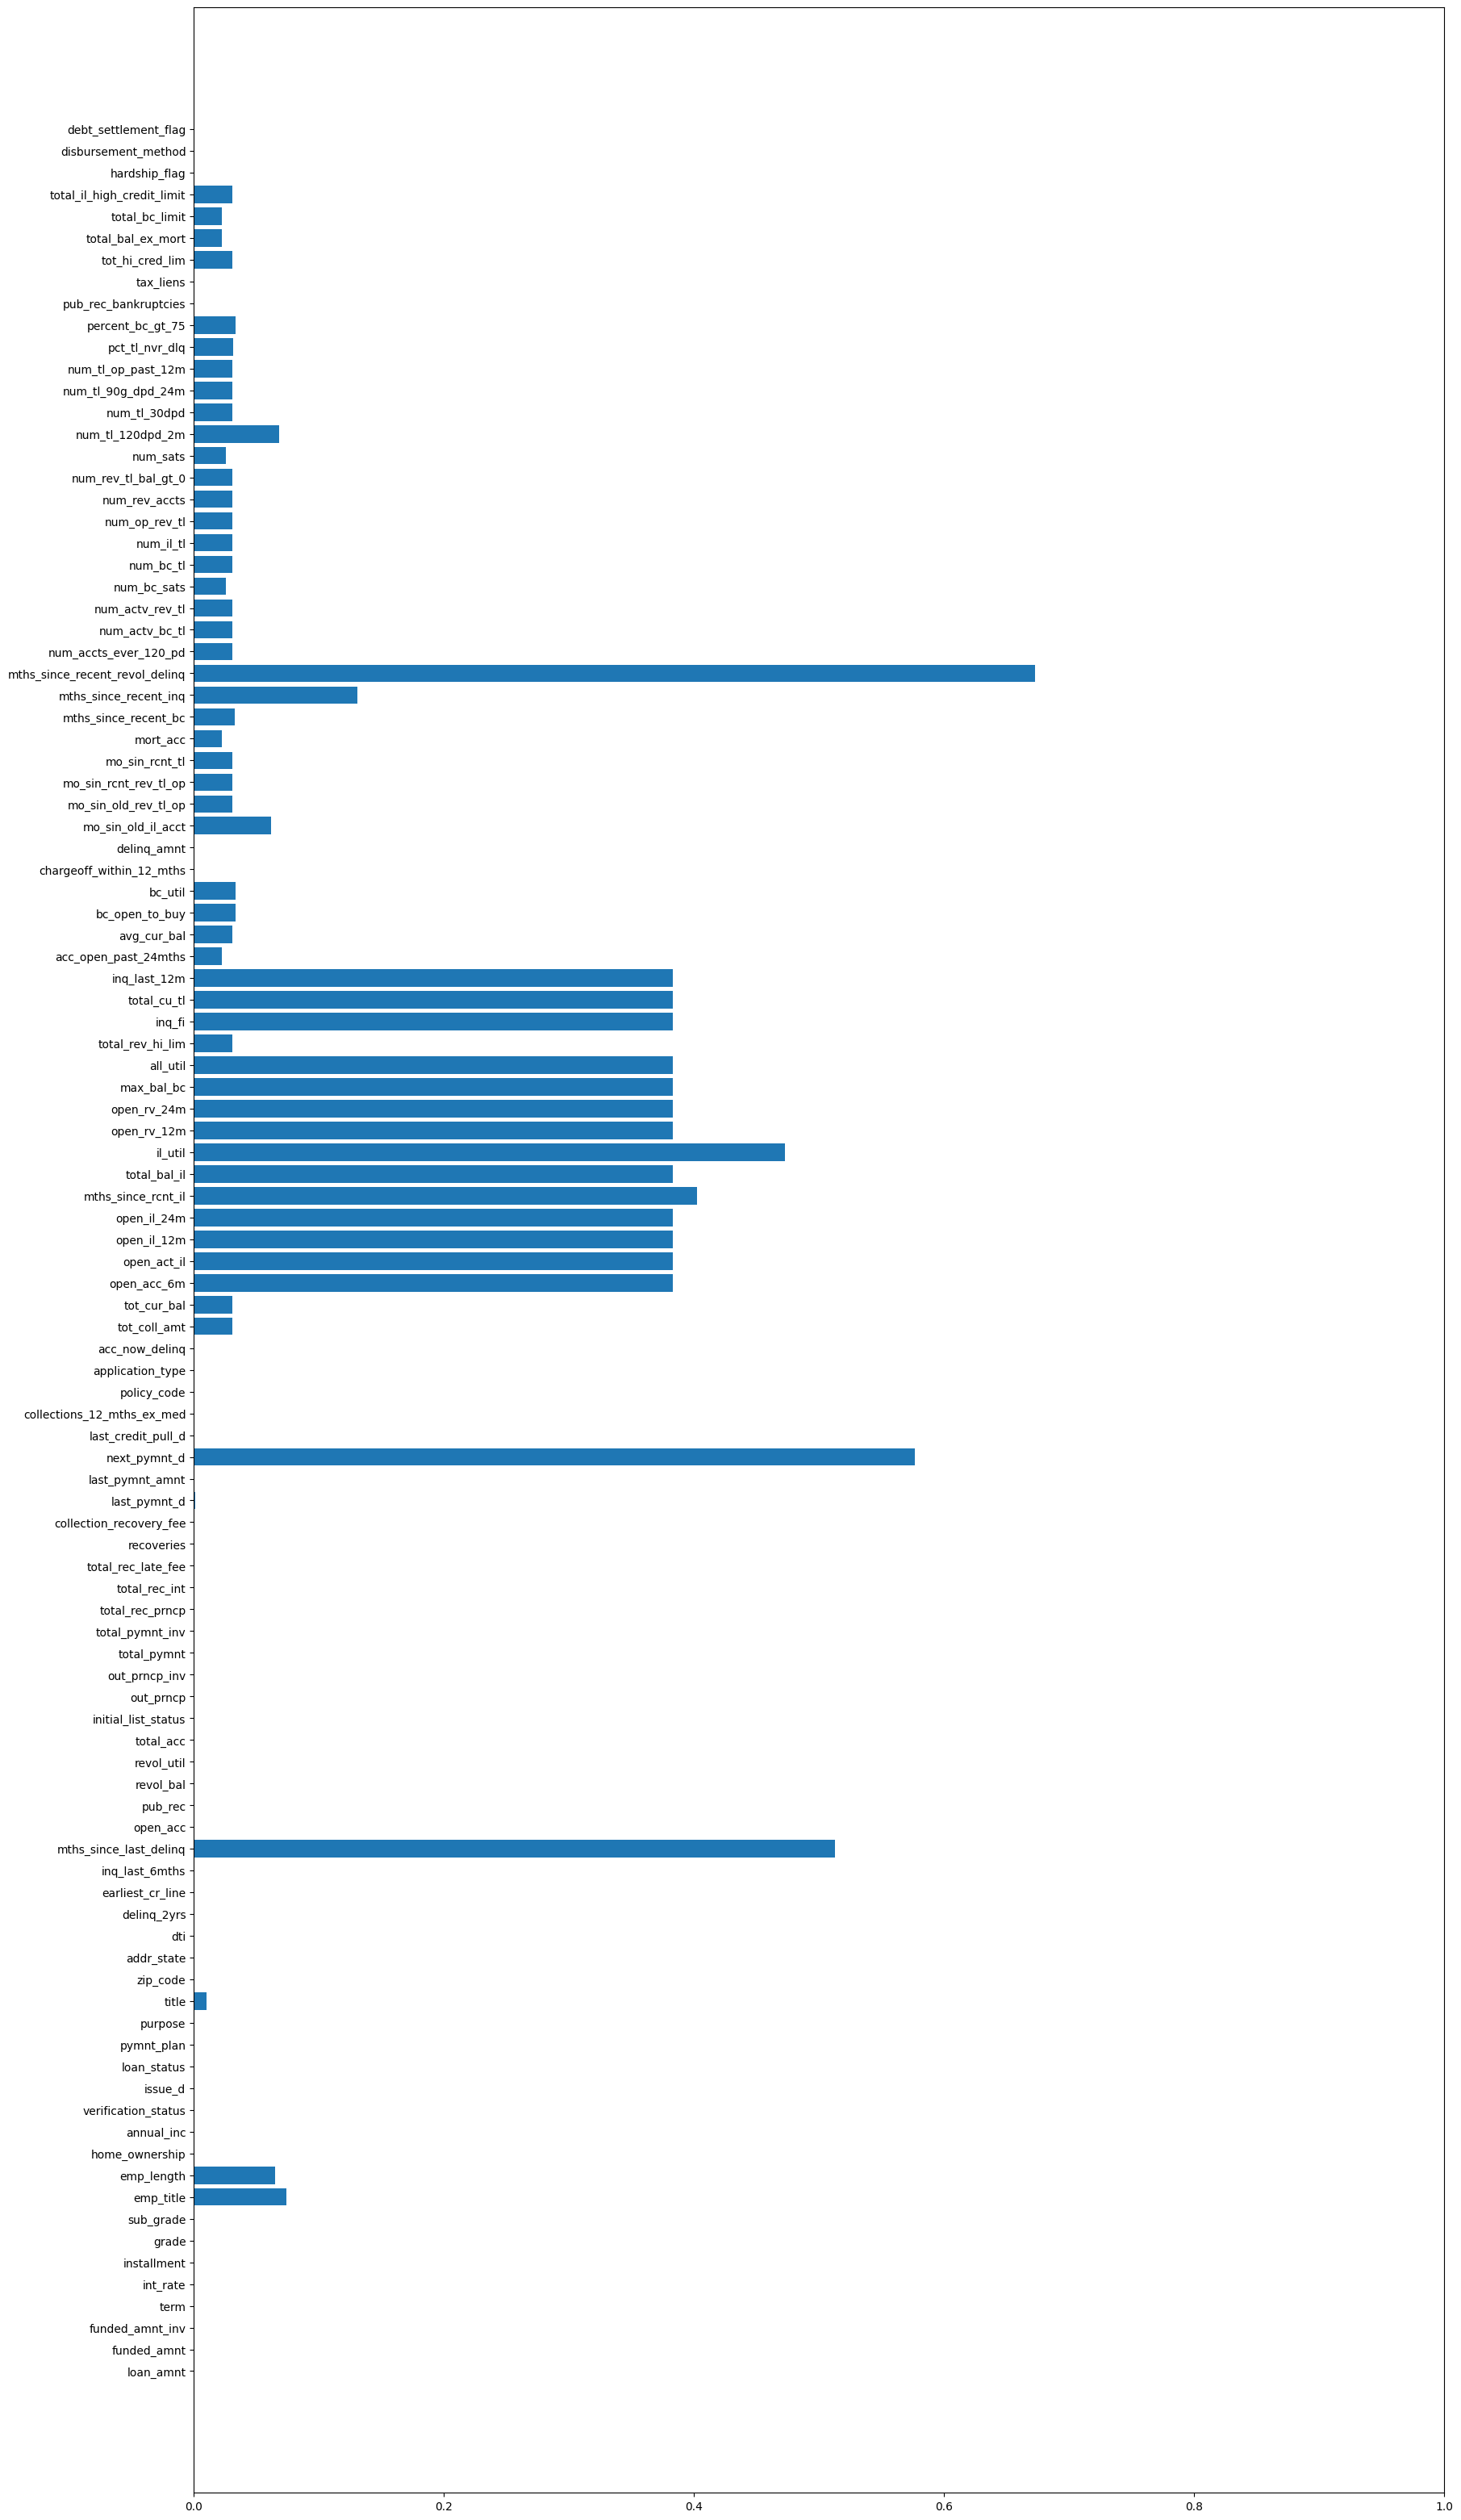

In [119]:
print(df.shape)
# check for nan rate
plot, ax = plt.subplots(figsize=(20, 40))
ax.barh(df.columns, df.isna().sum() / df.shape[0])
# get x to be 0 - 1
ax.set_xlim(0, 1)
